La velocidad horizontal en (-8-5j) es: -13.3271 m/s
La velocidad vertical en (-8-5j) es: -12.0433 m/s


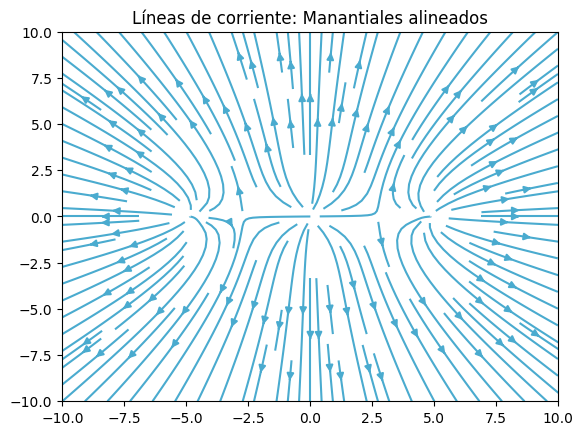

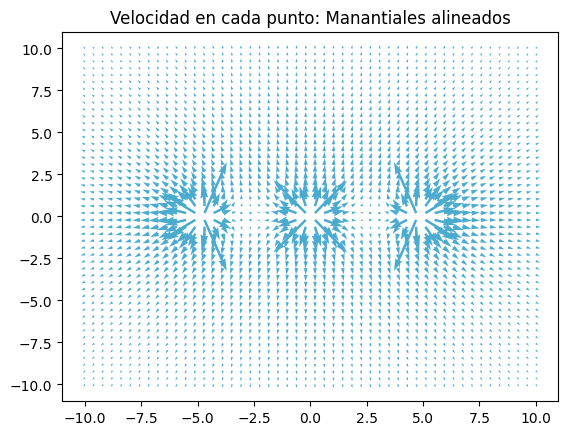

In [2]:
#Ejercicio 4: Manantiales alineados en el plano z=0
#Cálculo realizado derivando numéricamente el potencial complejo del flujo
import matplotlib.pyplot as plt
import cmath as c
import numpy as np

def prima(f,t,epsilon=10**(-7)):
    return (f(t+epsilon)-f(t))/(epsilon)

def uv(f,t):
    u=prima(f,t).real
    v=-prima(f,t).imag
    return u,v

def velgrid(f):
    for i in range(len(x)):
        for j in range(len(y)):
            t=complex(x[i],y[j])
            u,v=uv(f,t)
            U[j,i]=u
            V[j,i]=v
    return X,Y,U,V

x=np.linspace(-10,10,50)
y=x
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

#Parámetros del problema
a=4.8
Q=337
tm=[-a,0,a]
def manan(t):
    f=0
    for i in range(len(tm)):
        f+=c.log(t-tm[i])
    f*=(Q/(2*c.pi))
    return f

X,Y,U,V=velgrid(manan)

t0=complex(-8, -5) #Punto de interés
u0,v0=uv(manan,t0)
redon=4
print('La velocidad horizontal en',t0,'es:',round(u0,redon),'m/s')
print('La velocidad vertical en',t0,'es:',round(v0,redon),'m/s')

plt.figure()
plt.title("Líneas de corriente: Manantiales alineados")
plt.streamplot(X,Y,U,V,color='#4aabcf',density=1.5)
plt.show()
plt.figure()
plt.title("Velocidad en cada punto: Manantiales alineados")
plt.quiver(X,Y,U,V,color='#4aabcf',width=5e-3)
plt.show()

La velocidad horizontal en (-8-5j) es: -13.3271 m/s
La velocidad vertical en (-8-5j) es: -12.0433 m/s


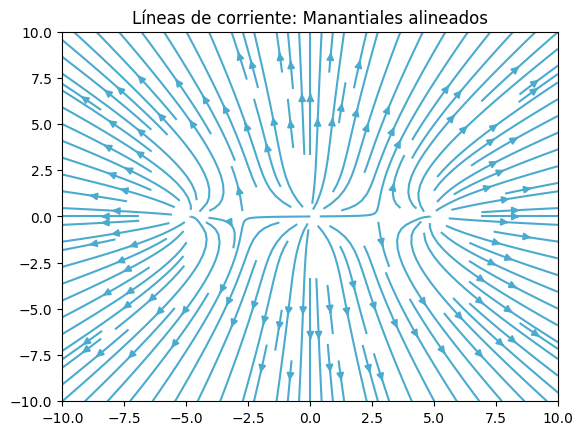

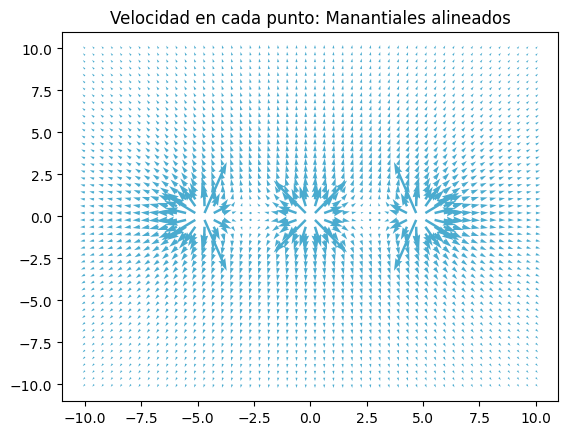

In [3]:
#Ejercicio 4: Manantiales alineados en el plano z=0
#Cálculo realizado derivando a partir de la velocidad conjugada
import matplotlib.pyplot as plt
import numpy as np

def velgrid(f):
    for i in range(len(x)):
        for j in range(len(y)):
            t=complex(x[i],y[j])
            u,v=uvmanan(t)
            U[j,i]=u
            V[j,i]=v
    return X,Y,U,V

x=np.linspace(-10,10,50)
y=x
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

#Parámetros del problema
a=4.8
Q=337
tm=[-a,0,a]
def uvmanan(t):
    fc=0
    for i in range(len(tm)):
        fc+=1/(t-tm[i])
    fc*=(Q/(2*c.pi))
    return fc.real,-fc.imag

X,Y,U,V=velgrid(uvmanan)

t0=complex(-8, -5) #Punto de interés
u0,v0=uvmanan(t0)
redon=4
print('La velocidad horizontal en',t0,'es:',round(u0,redon),'m/s')
print('La velocidad vertical en',t0,'es:',round(v0,redon),'m/s')

plt.figure()
plt.title("Líneas de corriente: Manantiales alineados")
plt.streamplot(X,Y,U,V,color='#4aabcf',density=1.5)
plt.show()
plt.figure()
plt.title("Velocidad en cada punto: Manantiales alineados")
plt.quiver(X,Y,U,V,color='#4aabcf',width=5e-3)
plt.show()